In [2]:
pip install pyldavis

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=562309a7b33be261e9ad9884ecd7468487ed1294393784ff74775aa3da190a7e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
import os.path

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data/data_final.csv')

In [8]:
# Convert to list
data = data.descripcion.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Hemos recibido su reporte srita Labrada nos disculpamos por los '
 'inconvenientes aspi mismo si hubo una confusión con la información que se '
 'brindo respecto a las políticas de su vuelo hemos validado que a su '
 'reservación SHZKR fue aplicada su reprogramación el día de mayo asi mismo '
 'anexamos la información correspondiente a su certificado electrónico por '
 'servicio de maleta adicional así como sus políticas de uso Número de '
 'certificado electrónico Titular Maura Labrada Araujo Monto MXN Vigencia OCT '
 'Es válido únicamente a través del call center Tiene una vigencia de días '
 'para hacerlo valido la fecha del vuelo puede ser posterior a esos días En '
 'caso de que el costo de su reservación sea mayor al monto de su voucher se '
 'tendrá que pagar el excedente No es residual En la reservación generada con '
 'él sólo puede ir un pasajero el titular del voucher Además el titular del '
 'voucher debe ser quién genere esta reservación Quedamos a sus órdenes para '
 'c

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['hemos', 'recibido', 'su', 'reporte', 'srita', 'labrada', 'nos', 'disculpamos', 'por', 'los', 'inconvenientes', 'aspi', 'mismo', 'si', 'hubo', 'una', 'confusion', 'con', 'la', 'informacion', 'que', 'se', 'brindo', 'respecto', 'las', 'politicas', 'de', 'su', 'vuelo', 'hemos', 'validado', 'que', 'su', 'reservacion', 'shzkr', 'fue', 'aplicada', 'su', 'reprogramacion', 'el', 'dia', 'de', 'mayo', 'asi', 'mismo', 'anexamos', 'la', 'informacion', 'correspondiente', 'su', 'certificado', 'electronico', 'por', 'servicio', 'de', 'maleta', 'adicional', 'asi', 'como', 'sus', 'politicas', 'de', 'uso', 'numero', 'de', 'certificado', 'electronico', 'titular', 'maura', 'labrada', 'araujo', 'monto', 'mxn', 'vigencia', 'oct', 'es', 'valido', 'unicamente', 'traves', 'del', 'call', 'center', 'tiene', 'una', 'vigencia', 'de', 'dias', 'para', 'hacerlo', 'valido', 'la', 'fecha', 'del', 'vuelo', 'puede', 'ser', 'posterior', 'esos', 'dias', 'en', 'caso', 'de', 'que', 'el', 'costo', 'de', 'su', 'reservacion', 

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['hemos_recibido', 'su', 'reporte', 'srita', 'labrada', 'nos', 'disculpamos', 'por', 'los', 'inconvenientes', 'aspi', 'mismo', 'si', 'hubo', 'una', 'confusion', 'con', 'la', 'informacion', 'que', 'se', 'brindo', 'respecto', 'las', 'politicas', 'de', 'su', 'vuelo', 'hemos', 'validado', 'que', 'su', 'reservacion', 'shzkr', 'fue', 'aplicada', 'su', 'reprogramacion', 'el', 'dia', 'de', 'mayo', 'asi', 'mismo', 'anexamos', 'la', 'informacion', 'correspondiente', 'su', 'certificado', 'electronico', 'por', 'servicio', 'de', 'maleta', 'adicional', 'asi', 'como', 'sus', 'politicas', 'de', 'uso', 'numero', 'de', 'certificado', 'electronico', 'titular', 'maura', 'labrada', 'araujo', 'monto', 'mxn', 'vigencia', 'oct', 'es', 'valido', 'unicamente', 'traves', 'del', 'call_center', 'tiene', 'una', 'vigencia', 'de', 'dias', 'para', 'hacerlo_valido', 'la', 'fecha', 'del', 'vuelo', 'puede', 'ser', 'posterior', 'esos', 'dias', 'en', 'caso', 'de', 'que', 'el', 'costo', 'de', 'su', 'reservacion', 'sea', 'ma

In [14]:
#Define stop words
stop_words_sp = set(stopwords.words('spanish'))
# stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_sp #| stop_words_en
#add words that aren't in the NLTK stopwords list
new_stopwords = ["buenas", "buen","blueaerolinea","saludos cordiales","com mx","www","gmail com","mailto","gmail", "com","hotmail","image004","hola","tarde","gmail com","muchas","gracias", "buenos","día","cid","mx","ustede","correo", "electronico",
                          "saludos","cordiales", "formato","pdf","solo","ustedes","quedo","espera","noche", "blue", "aerobu","adjunto podrá", "términos", "condiciones","correo electrónico","saber", "si","podrás encontrar","quedo","espera","noche",
                          "adjunto","podrá", "png","podrás","encontrar","grupos","quedo","favor","hoy", "quisiera", "tardes","adjunto podrá", "términos condiciones","correo electrónico","saber", "si","image","6c756af0","noches","01d57aa3",
                      "com", "nbsp","cognitoforms","dia","quedo","gracias","vea","saludos","favor", "días","hola","image004","xx ","tarde","gmail com","muchas","gracias", "buenos","día","cid","mx","ustede","puedo", "hacer"]
new_stopwords_list = stop_words.union(new_stopwords)


not_stopwords = {} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])
print(final_stop_words)

{'hubiste', 'muchos', 'erais', 'estás', 'hubieron', 'o', 'términos condiciones', 'tendrás', 'estaban', 'estaría', 'sean', 'son', 'ya', 'cual', 'hayas', 'nada', 'tus', 'él', 'otros', 'hayan', 'nosotras', 'mío', 'unos', 'las', 'tendríamos', 'tuvieras', 'estuviesen', 'tendréis', 'vea', 'todos', 'estéis', 'tuyas', 'fueran', 'suyos', 'habréis', 'adjunto', 'suya', 'blue', 'suyo', 'se', 'tuvo', 'noches', 'podrá', 'tienen', 'entre', 'somos', 'te', 'com', 'cognitoforms', 'nosotros', 'fueses', 'hasta', 'fueron', 'ella', 'adjunto podrá', 'sobre', 'tienes', 'hoy', 'estados', 'sentido', 'ha', 'esas', 'seamos', 'tuya', 'estarán', 'estuvieran', 'xx ', 'de', 'fuiste', 'estábamos', 'tuvisteis', 'esto', 'fue', 'muchas', 'uno', 'correo', 'habríais', 'hubieras', 'suyas', 'más', 'estaremos', 'estar', 'términos', 'has', 'fuerais', 'fuese', 'tendrá', 'si', 'estaré', 'durante', 'e', 'hubo', 'siente', 'serás', 'formato', 'mías', 'esos', 'hemos', 'tendrías', 'tuviéramos', 'serías', 'habíais', 'hotmail', 'qué', 

In [15]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    # return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    return [[word for word in simple_preprocess(str(doc)) if word not in final_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [16]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 2), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 3), (65, 2)]]


In [18]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ademas', 1),
  ('adicional', 1),
  ('aleyda_garza', 1),
  ('anexamos', 1),
  ('aplicada', 1),
  ('araujo', 1),
  ('asi', 2),
  ('aspi', 1),
  ('brindo', 1),
  ('call_center', 1),
  ('caso', 1),
  ('certificado', 2),
  ('clientes', 1),
  ('confusion', 1),
  ('correspondiente', 1),
  ('costo', 1),
  ('cualquier', 1),
  ('debe', 1),
  ('dias', 2),
  ('disculpamos', 1),
  ('excedente', 1),
  ('fecha', 1),
  ('generada', 1),
  ('genere', 1),
  ('hacerlo_valido', 1),
  ('inconvenientes', 1),
  ('informacion', 3),
  ('ir', 1),
  ('labrada', 2),
  ('maleta', 1),
  ('maura', 1),
  ('mayo', 1),
  ('mayor', 1),
  ('mismo', 2),
  ('monto', 2),
  ('mxn', 1),
  ('numero', 1),
  ('oct', 1),
  ('ordenes', 1),
  ('pagar', 1),
  ('pasajero', 1),
  ('politicas', 2),
  ('posterior', 2),
  ('puede', 2),
  ('quedamos', 1),
  ('recibido', 1),
  ('reporte', 1),
  ('reprogramacion', 1),
  ('requiera', 1),
  ('reservacion', 4),
  ('residual', 1),
  ('respecto', 1),
  ('ser', 2),
  ('servicio', 2),
  ('shzkr

In [19]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"covid" + 0.020*"viajar" + 0.018*"factura" + 0.017*"informacion" + '
  '0.017*"prueba" + 0.014*"atencion" + 0.013*"boleto" + 0.012*"necesito" + '
  '0.012*"numero" + 0.010*"caso"'),
 (1,
  '0.021*"reservacion" + 0.021*"cotizacion" + 0.016*"nombre" + 0.014*"clave" + '
  '0.011*"fecha" + 0.010*"solicito" + 0.009*"pago" + 0.009*"cambio" + '
  '0.008*"respuesta" + 0.008*"presente"'),
 (2,
  '0.070*"vuelo" + 0.040*"julio" + 0.026*"mexico" + 0.022*"monterrey" + '
  '0.020*"cancun" + 0.019*"ciudad" + 0.017*"pm" + 0.017*"vuelos" + '
  '0.016*"regreso" + 0.014*"viaje"'),
 (3,
  '0.023*"vuelo" + 0.014*"maleta" + 0.013*"mas" + 0.010*"vb" + '
  '0.008*"aerolinea" + 0.008*"equipaje" + 0.008*"aeropuerto" + 0.007*"tenia" + '
  '0.006*"manana" + 0.006*"quiero"')]


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.590414941748955

Coherence Score:  0.5780073600606763


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.308000  0.068363       1        1  36.536173
3     -0.043040 -0.340539       2        1  28.225668
2     -0.265872  0.134794       3        1  18.740238
0      0.000912  0.137382       4        1  16.497920, topic_info=            Term          Freq         Total Category  logprob  loglift
65         vuelo  27037.000000  27037.000000  Default  30.0000  30.0000
655        julio  10519.000000  10519.000000  Default  29.0000  29.0000
49   reservacion  10912.000000  10912.000000  Default  28.0000  28.0000
205   cotizacion  10705.000000  10705.000000  Default  27.0000  27.0000
949        covid   5751.000000   5751.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
45      recibido   1019.687468   1220.164099   Topic4  -5.4170   1.6224
334      boletos   1207.185352   2672.501280   Topic4  -5.2482   1.0072
185    respuesta   1402.620750   7226.723660   Topic4  -5.0981   0.1625
181       puedan   1069.087135   1824.839569   Topic4  -5.3697   1.2672
190    siguiente   1034.109765   3696.206245   Topic4  -5.4029   0.5282

[200 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1212      2  0.999837     abordar
81        1  0.043057     aerobus
81        3  0.956751     aerobus
120       2  0.999920   aerolinea
768       2  0.999721  aeropuerto
...     ...       ...         ...
1696      4  0.999573      viajes
815       3  0.998938       volar
65        2  0.326992       vuelo
65        3  0.672995       vuelo
276       3  0.999978      vuelos

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

##Building LDA Mallet Model

In [23]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [24]:
!pip install --upgrade gensim==3.8

     |████████████████████████████████| 24.2 MB 102 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [25]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-04-01 20:27:13--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-01 20:27:13--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  12.0MB/s    in 1.3s    

2022-04-01 20:27:15 (12.0 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [27]:
import zipfile
from google.colab import files

uploaded = files.upload()

Saving temp_file_corpus.zip to temp_file_corpus.zip


In [28]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting temp_file_corpus.zip

Here is a directory listing (you should see a directory with your corpus):
total 32220
drwx------  5 root root     4096 Apr  1 20:05 drive
drwxr-xr-x 10 root root     4096 Nov 14  2016 mallet-2.0.8
-rw-r--r--  1 root root 16184794 Nov 14  2016 mallet-2.0.8.zip
drwxr-xr-x  1 root root     4096 Mar 23 14:22 sample_data
-rw-r--r--  1 root root 12922505 Apr  1 20:31 temp_file_corpus.txt
-rw-r--r--  1 root root  3867394 Apr  1 20:30 temp_file_corpus.zip


In [29]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = '/content' # you need to change this path to the directory containing your corpus of .txt files

In [30]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)

In [31]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('nombre', 0.03620165452874213),
   ('clave', 0.02173596582803382),
   ('reservacion', 0.021041379855343115),
   ('factura', 0.017040231916849325),
   ('datos', 0.015081249922015047),
   ('solicito', 0.012847760896057497),
   ('pasajero', 0.012490069916108987),
   ('mexico', 0.012099105356630384),
   ('apoyo', 0.01050613273662714),
   ('rfc', 0.00796486310001622)]),
 (1,
  [('vuelo', 0.12607265158127978),
   ('vuelos', 0.0190827905727523),
   ('mexico', 0.01594037467266501),
   ('quiero', 0.014834709818930593),
   ('viajar', 0.014642225654110433),
   ('necesito', 0.01410058416705835),
   ('ciudad', 0.012072785872557577),
   ('cambiar', 0.011096935920678619),
   ('boleto', 0.010882069876228206),
   ('tijuana', 0.009991271066944201)]),
 (2,
  [('maleta', 0.01791953760245567),
   ('aeropuerto', 0.014674427717728505),
   ('equipaje', 0.013437612252228717),
   ('servicio', 0.012833491166770074),
   ('aerolinea', 0.012364072755771805),
   ('avion', 0.01051089050713516),
   ('abordar'

In [32]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [33]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=40, step=6)

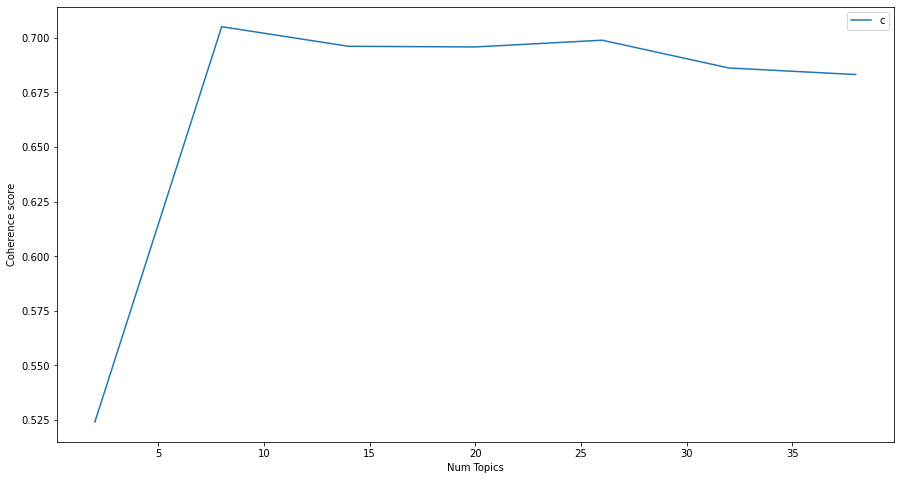

In [49]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.figure(figsize=(15,8))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5241
Num Topics = 8  has Coherence Value of 0.7051
Num Topics = 14  has Coherence Value of 0.6961
Num Topics = 20  has Coherence Value of 0.6958
Num Topics = 26  has Coherence Value of 0.6989
Num Topics = 32  has Coherence Value of 0.6862
Num Topics = 38  has Coherence Value of 0.6832


In [52]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.027*"reservacion" + 0.022*"pago" + 0.016*"boleto" + 0.016*"compra" + '
  '0.015*"pagina" + 0.014*"boletos" + 0.013*"tarjeta" + 0.012*"reserva" + '
  '0.012*"costo" + 0.011*"comprar"'),
 (1,
  '0.132*"vuelo" + 0.041*"mexico" + 0.036*"cancun" + 0.035*"monterrey" + '
  '0.032*"ciudad" + 0.022*"regreso" + 0.019*"julio" + 0.019*"pm" + '
  '0.019*"cdmx" + 0.017*"vuelos"'),
 (2,
  '0.029*"reservacion" + 0.024*"covid" + 0.022*"nombre" + 0.017*"clave" + '
  '0.016*"cambio" + 0.015*"prueba" + 0.011*"motivo" + 0.011*"reembolso" + '
  '0.010*"solicito" + 0.010*"anexo"'),
 (3,
  '0.051*"vuelo" + 0.023*"viajar" + 0.020*"vuelos" + 0.019*"necesito" + '
  '0.018*"mas" + 0.017*"puede" + 0.013*"quiero" + 0.012*"cambiar" + '
  '0.011*"poder" + 0.010*"gustaria"'),
 (4,
  '0.044*"cotizacion" + 0.035*"fecha" + 0.033*"dias" + 0.021*"confirmacion" + '
  '0.018*"mty" + 0.017*"cuenta" + 0.016*"presente" + 0.014*"pasajeros" + '
  '0.012*"enviar" + 0.011*"nueva"'),
 (5,
  '0.023*"maleta" + 0.019*"aeropue

In [53]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.3062,"atencion, respuesta, numero, mas, informacion,...",Hemos recibido su reporte srita Labrada nos di...
1,1,5.0,0.1513,"maleta, aeropuerto, equipaje, abordar, avion, ...",MundoGodinez blueaerolinea Asi le hacen difici...
2,2,6.0,0.1417,"atencion, respuesta, numero, mas, informacion,...",Gil blueaerolinea Profeco Buen día puedes pres...
3,3,0.0,0.1343,"reservacion, pago, boleto, compra, pagina, bol...",MpinedaC Profeco blueaerolinea Que dice ese ar...
4,4,6.0,0.1653,"atencion, respuesta, numero, mas, informacion,...",mtharo blueaerolinea Viajar con blue Aerobus d...
5,5,5.0,0.1740,"maleta, aeropuerto, equipaje, abordar, avion, ...",valdemarcito blueaerolinea Totalmente Por ahor...
6,6,5.0,0.1460,"maleta, aeropuerto, equipaje, abordar, avion, ...",Rulokz blueaerolinea Aguas esos se caen antes ...
7,7,3.0,0.1682,"vuelo, viajar, vuelos, necesito, mas, puede, q...",isaiyokey blueaerolinea Profeco Hola para apoy...
8,8,2.0,0.1493,"reservacion, covid, nombre, clave, cambio, pru...",BiitaT blueaerolinea blueaerolinea mi familia ...
9,9,6.0,0.1837,"atencion, respuesta, numero, mas, informacion,...",AldoGerez blueaerolinea Profeco BlueTeEscucha ...


In [55]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(8)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5248,"reservacion, pago, boleto, compra, pagina, bol...",disculpa una pregunta de casualidad tú sabes a...
1,1.0,0.5857,"vuelo, mexico, cancun, monterrey, ciudad, regr...",va ya con toda la info completa denise ann she...
2,2.0,0.5324,"reservacion, covid, nombre, clave, cambio, pru...",Buen día Por medio del presente y por instrucc...
3,3.0,0.4593,"vuelo, viajar, vuelos, necesito, mas, puede, q...",Hola he tenido la tan mala suerte dos veces co...
4,4.0,0.5890,"cotizacion, fecha, dias, confirmacion, mty, cu...",Buen día Solicito apoyo con las siguientes cot...
5,5.0,0.6340,"maleta, aeropuerto, equipaje, abordar, avion, ...",El mié de mayo de p m Daniel Suga sugadaniel g...
6,6.0,0.5841,"atencion, respuesta, numero, mas, informacion,...",Buenos dias Gracias por responder me Por las r...
7,7.0,0.6303,"nombre, factura, clave, datos, pasajero, solic...",Estimados buenas noches Serías tan amables de ...


In [56]:
# sent_topics_sorteddf_mallet.to_csv('top_mensajes', index = False)

In [57]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,6.0,"atencion, respuesta, numero, mas, informacion,...",7707.0,0.1306
1.0,5.0,"maleta, aeropuerto, equipaje, abordar, avion, ...",10923.0,0.1850
2.0,6.0,"atencion, respuesta, numero, mas, informacion,...",6590.0,0.1116
3.0,0.0,"reservacion, pago, boleto, compra, pagina, bol...",8305.0,0.1407
4.0,6.0,"atencion, respuesta, numero, mas, informacion,...",5322.0,0.0902
...,...,...,...,...
59024.0,4.0,"cotizacion, fecha, dias, confirmacion, mty, cu...",NaN,NaN
59025.0,4.0,"cotizacion, fecha, dias, confirmacion, mty, cu...",NaN,NaN
59026.0,7.0,"nombre, factura, clave, datos, pasajero, solic...",NaN,NaN
59027.0,4.0,"cotizacion, fecha, dias, confirmacion, mty, cu...",NaN,NaN


In [58]:
df_dominant_topics.to_csv('dominant_topics', index = False)